# Телеком — задача проекта

# Описание задачи

Оператору связи необходимо научиться прогнозировать отток клиентов. Собирающимся уйти пользователям будут предложены промокоды и специальные условия. Для решения задачи имеются персональные данные о некоторых клиентах, информация об их тарифах и договорах.

**Описание услуг:**

Основные услуги:
1. Стационарная телефонная связь. Возможно подключение телефонного аппарата к нескольким линиям одновременно.
2. Интернет. Подключение может быть двух типов: через телефонную линию (DSL, от англ. digital subscriber line, «цифровая абонентская линия») или оптоволоконный кабель (Fiber optic).

Дополнительные услуги:
* Интернет-безопасность: антивирус (DeviceProtection) и блокировка небезопасных сайтов (OnlineSecurity);
* Выделенная линия технической поддержки (TechSupport);
* Облачное хранилище файлов для резервного копирования данных (OnlineBackup);
* Стриминговое телевидение (StreamingTV) и каталог фильмов (StreamingMovies).

За услуги клиенты могут платить каждый месяц или заключить договор на 1–2 года. Доступны различные способы расчёта и возможность получения электронного чека.

# План работы

1. Подготовка данных
    1. Изучение данных
    2. Обработка данных
        1. Кодирование целевого признака и добавление двух бинарных признаков
        2. Время действия контракта
        3. Преобразование типов данных
        4. Объединение таблиц
        5. Удаление бесполезных для обучения признаков
        6. Обработка пропусков
        7. Кодирование категориальных признаков
        8. Разделение набора данных на обучающую, валидационную и тестовую выборки
        9. Исследование корреляции численных признаков
        10. Исследование важности признаков contract_time и TotalCharges
        11. Удаление признака TotalCharges
        12. Повторное разделение набора данных на выборки
2. Создание и обучение модели
    1. Логистическая регрессия
    2. Решающее дерево
    3. Случайный лес
    4. CatBoostClassifier   
3. Финальная проверка модели на тестовой выборке
    1. Логистическая регрессия
    2. Решающее дерево
    3. Случайный лес
    4. CatBoostClassifier
4. Вывод

 <font size="4" color='black'><b>Описание данных</b></font>

Данные состоят из файлов, полученных из разных источников:

* contract.csv — информация о договоре;

* personal.csv — персональные данные клиента;

* internet.csv — информация об интернет-услугах;

* phone.csv — информация об услугах телефонии.


Во всех файлах столбец customerID содержит код клиента.

Информация о договорах актуальна на 1 февраля 2020.

## Подготовка данных

### Изучение данных

In [885]:
#Импорт необходимых библиотек и функций
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score 
import matplotlib.pyplot as plt 

In [886]:
#Загрузка данных
data_contract = pd.read_csv('datasets/contract.csv')
data_personal = pd.read_csv('datasets/personal.csv')
data_internet = pd.read_csv('datasets/internet.csv')
data_phone = pd.read_csv('datasets/phone.csv')

In [887]:
# Информация о договоре
data_contract

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65
...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,No,One year,Yes,Mailed check,84.80,1990.5
7039,2234-XADUH,2014-02-01,No,One year,Yes,Credit card (automatic),103.20,7362.9
7040,4801-JZAZL,2019-03-01,No,Month-to-month,Yes,Electronic check,29.60,346.45
7041,8361-LTMKD,2019-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Mailed check,74.40,306.6


In [888]:
# Проверка таблицы на пропуски
data_contract.isna().sum()

customerID          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

Вывод: пропуски отсутствуют

In [889]:
# Персональные данные клиента
data_personal

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No
...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes
7039,2234-XADUH,Female,0,Yes,Yes
7040,4801-JZAZL,Female,0,Yes,Yes
7041,8361-LTMKD,Male,1,Yes,No


In [890]:
# Проверка таблицы на пропуски
data_personal.isna().sum()

customerID       0
gender           0
SeniorCitizen    0
Partner          0
Dependents       0
dtype: int64

Вывод: пропуски отсутствуют

In [891]:
# Информация об интернет-услугах
data_internet

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...
5512,6840-RESVB,DSL,Yes,No,Yes,Yes,Yes,Yes
5513,2234-XADUH,Fiber optic,No,Yes,Yes,No,Yes,Yes
5514,4801-JZAZL,DSL,Yes,No,No,No,No,No
5515,8361-LTMKD,Fiber optic,No,No,No,No,No,No


In [892]:
# Проверка таблицы на пропуски
data_internet.isna().sum()

customerID          0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64

Вывод: пропуски отсутствуют

In [893]:
# Информация об услугах интернет-телефонии
data_phone

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes
...,...,...
6356,2569-WGERO,No
6357,6840-RESVB,Yes
6358,2234-XADUH,Yes
6359,8361-LTMKD,Yes


In [894]:
# Проверки таблицы на пропуски
data_phone.isna().sum()

customerID       0
MultipleLines    0
dtype: int64

Вывод: пропуски отсутствуют

<font size="4" color='black'><b>Общий вывод</b></font>

Целевым признаком является столбец EndDate в таблице data_contract. Однако данный столбец необходимо "закодировать", создав на основе его значений новый столбец с двумя классами и двумя значениями - 0 и 1. Этот новый столбец будет использован как целевой признак при обучении модели. Пропуски во всех таблицах отсутствуют, однако они могут появиться после объединения таблиц.

### Обработка данных

#### Кодирование целевого признака и добавление двух бинарных признаков

In [895]:
# Добавление столбца целевого признака с классами 0 и 1
data_contract['Exited'] = (data_contract['EndDate']!='No').astype(int)

In [896]:
#Таблица после добавления нового столбца целевого признака
data_contract

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Exited
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,No,One year,Yes,Mailed check,84.80,1990.5,0
7039,2234-XADUH,2014-02-01,No,One year,Yes,Credit card (automatic),103.20,7362.9,0
7040,4801-JZAZL,2019-03-01,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,8361-LTMKD,2019-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Mailed check,74.40,306.6,1


Добавим дополнительно два бинарных признака и затем посмотрим как они будут влиять на метрику. Это признаки отвечающие на вопрос пользуется ли клиент интернетом и телефоном. На данном этапе эти признаки добавляются в таблицы пользователей интернета и телефона и заполняются только утвердительными ответами. После объединения таблиц у этих признаков появятся пропуски, которые заполним значением 'No'. Затем эти признаки будут закодированы.

In [897]:
# Добавление признака "Пользуется Интернетом" со значениями "Да/Нет"
data_internet['InternetClient'] = 'Yes'

In [898]:
# Добавление признака "Пользуется Телефоном" со значениями "Да/Нет"
data_phone['PhoneClient'] = 'Yes'

#### Время действия контракта

Добавим столбец нового признака с временем действия контракта, которое вычислим на основе данных BeginDate и EndDate.

In [899]:
# Тип данных в столбцах BeginDate и EndDate
data_contract.loc[:,['BeginDate','EndDate']].dtypes

BeginDate    object
EndDate      object
dtype: object

По условию задачи информация о договорах актуальна на 1 февраля 2020. Поэтому, в стобце EndDate значения 'No' заполним значением '2020-02-01 00:00:00'.

In [900]:
#Заполнение значений 'No' в  столбце EndDate значением '2020-02-01 00:00:00'
data_contract.loc[data_contract['EndDate']=='No', 'EndDate'] = '2020-02-01 00:00:00'

Данные в столбцах BeginDate и EndDate, хотя и содержат даты, относятся к строковому типу. Поэтому, чтобы найти период между двумя датами, данные в этих столбцах нужно преобразовать к типу datetime64.

In [901]:
# Преобразование столбца BeginDate к типу datetime64
data_contract['BeginDate'] = data_contract['BeginDate'].astype('datetime64[ns]')

In [902]:
# Преобразование столбца EndDate к типу datetime64
data_contract['EndDate'] = data_contract['EndDate'].astype('datetime64[ns]')

In [903]:
# Тип данных в столбцах BeginDate и EndDate
data_contract.loc[:,['BeginDate','EndDate']].dtypes

BeginDate    datetime64[ns]
EndDate      datetime64[ns]
dtype: object

In [904]:
# Нахождение периода между EndDate и BeginDate и сохранение в столбце contract_time
data_contract['contract_time'] = data_contract['EndDate'] - data_contract['BeginDate']

#### Преобразование типов данных

Обучение модели может потребовать преобразования типов некоторых признаков.

In [905]:
# Типы данных признаков
data_contract.dtypes

customerID                   object
BeginDate            datetime64[ns]
EndDate              datetime64[ns]
Type                         object
PaperlessBilling             object
PaymentMethod                object
MonthlyCharges              float64
TotalCharges                 object
Exited                        int32
contract_time       timedelta64[ns]
dtype: object

In [906]:
# Просмотр таблицы
data_contract

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Exited,contract_time
0,7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,29.85,0,31 days
1,5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,1889.5,0,1036 days
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,Yes,Mailed check,53.85,108.15,1,61 days
3,7795-CFOCW,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,1840.75,0,1371 days
4,9237-HQITU,2019-09-01,2019-11-01,Month-to-month,Yes,Electronic check,70.70,151.65,1,61 days
...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,2020-02-01,One year,Yes,Mailed check,84.80,1990.5,0,730 days
7039,2234-XADUH,2014-02-01,2020-02-01,One year,Yes,Credit card (automatic),103.20,7362.9,0,2191 days
7040,4801-JZAZL,2019-03-01,2020-02-01,Month-to-month,Yes,Electronic check,29.60,346.45,0,337 days
7041,8361-LTMKD,2019-07-01,2019-11-01,Month-to-month,Yes,Mailed check,74.40,306.6,1,123 days


Преобразуем признак contract_time к целочисленному. Для этого в столбце contract_time определим число дней и этим целочисленным результатом заменим имеющийся результат.

In [907]:
# Преобразование столбца contract_time к целочисленному типу
data_contract['contract_time'] = data_contract['contract_time'].dt.days

Преобразуем признак TotalCharges, который не относится к категориальным и является числовым, но по-умолчанию имеет строковый тип, к вещественному типу float64. Нужно учесть, что столбец TotalCharges содержит небольшое число "пустых значений", то есть пробелы вместо значений. 

In [908]:
# Относительное число пустых значений в столбце TotalCharges
(data_contract['TotalCharges']==' ').mean()

0.001561834445548772

Просмотрим данные о клиентах, у которых столбец TotalCharges содержит пробелы.

In [909]:
data_contract[data_contract['TotalCharges']==' ']

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Exited,contract_time
488,4472-LVYGI,2020-02-01,2020-02-01,Two year,Yes,Bank transfer (automatic),52.55,,0,0
753,3115-CZMZD,2020-02-01,2020-02-01,Two year,No,Mailed check,20.25,,0,0
936,5709-LVOEQ,2020-02-01,2020-02-01,Two year,No,Mailed check,80.85,,0,0
1082,4367-NUYAO,2020-02-01,2020-02-01,Two year,No,Mailed check,25.75,,0,0
1340,1371-DWPAZ,2020-02-01,2020-02-01,Two year,No,Credit card (automatic),56.05,,0,0
3331,7644-OMVMY,2020-02-01,2020-02-01,Two year,No,Mailed check,19.85,,0,0
3826,3213-VVOLG,2020-02-01,2020-02-01,Two year,No,Mailed check,25.35,,0,0
4380,2520-SGTTA,2020-02-01,2020-02-01,Two year,No,Mailed check,20.00,,0,0
5218,2923-ARZLG,2020-02-01,2020-02-01,One year,Yes,Mailed check,19.70,,0,0
6670,4075-WKNIU,2020-02-01,2020-02-01,Two year,No,Mailed check,73.35,,0,0


Поскольку в каждой записи признак contract_time равен нулю, данные клиенты являются "новичками", которые еще не успели ничего оплатить. В таком случае, логично заполнить пропуски в столбце TotalCharges нулями.

In [910]:
data_contract['TotalCharges'].replace(' ', 0, inplace=True)

In [911]:
# Преобразование данных столбца TotalCharges к вещественному типу.
data_contract['TotalCharges'] = pd.to_numeric(data_contract['TotalCharges'])

In [912]:
# Типы данных признаков
data_contract.dtypes

customerID                  object
BeginDate           datetime64[ns]
EndDate             datetime64[ns]
Type                        object
PaperlessBilling            object
PaymentMethod               object
MonthlyCharges             float64
TotalCharges               float64
Exited                       int32
contract_time                int64
dtype: object

Удалим столбцы BeginDate и EndDate

In [913]:
# Удаление столбцов BeginDate и EndDate
data_contract = data_contract.drop(['BeginDate', 'EndDate'],axis=1)

In [914]:
# Повторный просмотр всех столбцов и их типов данных
data_contract.dtypes

customerID           object
Type                 object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Exited                int32
contract_time         int64
dtype: object

Признаки типа object будут в дальнейшем закодированы и таким образом преобразованы к целочисленным типам. Остальные признаки готовы для обучения модели.

#### Объединение таблиц

Для получения единого набора данных объединим все таблицы по общему признаку customerID.

In [915]:
# Объединение таблиц data_contract и data_personal
data_full = data_contract.merge(data_personal, how = 'left')

In [916]:
# Объединение предыдущей таблицы с таблицей data_internet
data_full = data_full.merge(data_internet, how = 'left')

In [917]:
# Объединение предыдущей таблицы с таблицей data_phone
data_full = data_full.merge(data_phone, how = 'left')

In [918]:
# Объединенная таблица
data_full

,customerID,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Exited,contract_time,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,InternetClient,MultipleLines,PhoneClient
0,7590-VHVEG,Month-to-month,Yes,Electronic check,29.85,29.85,0,31,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,Yes,NaN,NaN
1,5575-GNVDE,One year,No,Mailed check,56.95,1889.50,0,1036,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes
2,3668-QPYBK,Month-to-month,Yes,Mailed check,53.85,108.15,1,61,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,Yes,No,Yes
3,7795-CFOCW,One year,No,Bank transfer (automatic),42.30,1840.75,0,1371,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,Yes,NaN,NaN
4,9237-HQITU,Month-to-month,Yes,Electronic check,70.70,151.65,1,61,Female,0,No,No,Fiber optic,No,No,No,No,No,No,Yes,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,One year,Yes,Mailed check,84.80,1990.50,0,730,Male,0,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes
7039,2234-XADUH,One year,Yes,Credit card (automatic),103.20,7362.90,0,2191,Female,0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes
7040,4801-JZAZL,Month-to-month,Yes,Electronic check,29.60,346.45,0,337,Female,0,Yes,Yes,DSL,Yes,No,No,No,No,No,Yes,NaN,NaN
7041,8361-LTMKD,Month-to-month,Yes,Mailed check,74.40,306.60,1,123,Male,1,Yes,No,Fiber optic,No,No,No,No,No,No,Yes,Yes,Yes


#### Удаление бесполезных для обучения признаков

Просмотрим все столбцы с их значениями и удалим бесполезные для обучения признаки.

In [919]:
# Просмотр всех столбцов таблицы
pd.set_option('display.max_columns', None)
data_full

,customerID,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Exited,contract_time,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,InternetClient,MultipleLines,PhoneClient
0,7590-VHVEG,Month-to-month,Yes,Electronic check,29.85,29.85,0,31,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,Yes,NaN,NaN
1,5575-GNVDE,One year,No,Mailed check,56.95,1889.50,0,1036,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes
2,3668-QPYBK,Month-to-month,Yes,Mailed check,53.85,108.15,1,61,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,Yes,No,Yes
3,7795-CFOCW,One year,No,Bank transfer (automatic),42.30,1840.75,0,1371,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,Yes,NaN,NaN
4,9237-HQITU,Month-to-month,Yes,Electronic check,70.70,151.65,1,61,Female,0,No,No,Fiber optic,No,No,No,No,No,No,Yes,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,One year,Yes,Mailed check,84.80,1990.50,0,730,Male,0,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes
7039,2234-XADUH,One year,Yes,Credit card (automatic),103.20,7362.90,0,2191,Female,0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes
7040,4801-JZAZL,Month-to-month,Yes,Electronic check,29.60,346.45,0,337,Female,0,Yes,Yes,DSL,Yes,No,No,No,No,No,Yes,NaN,NaN
7041,8361-LTMKD,Month-to-month,Yes,Mailed check,74.40,306.60,1,123,Male,1,Yes,No,Fiber optic,No,No,No,No,No,No,Yes,Yes,Yes


Удалим бесполезный для обучения признак customerID

In [920]:
data_full = data_full.drop(['customerID'],axis=1)

#### Обработка пропусков

Определим наличие и относительное число пропусков, заполним их или удалим.

In [921]:
# Относительное число пропусков
data_full.isna().mean()

Type                0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
TotalCharges        0.000000
Exited              0.000000
contract_time       0.000000
gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
InternetService     0.216669
OnlineSecurity      0.216669
OnlineBackup        0.216669
DeviceProtection    0.216669
TechSupport         0.216669
StreamingTV         0.216669
StreamingMovies     0.216669
InternetClient      0.216669
MultipleLines       0.096834
PhoneClient         0.096834
dtype: float64

Столбцы с пропусками являются категориальными. Просмотрим их уникальные значения.

In [922]:
# Уникальные значения столбца InternetService
data_full['InternetService'].unique()

array(['DSL', 'Fiber optic', nan], dtype=object)

In [923]:
# Уникальные значения столбца OnlineSecurity
data_full['OnlineSecurity'].unique()

array(['No', 'Yes', nan], dtype=object)

In [924]:
# Уникальные значения столбца OnlineBackup
data_full['OnlineBackup'].unique()

array(['Yes', 'No', nan], dtype=object)

In [925]:
# Уникальные значения столбца DeviceProtection
data_full['DeviceProtection'].unique()

array(['No', 'Yes', nan], dtype=object)

In [926]:
# Уникальные значения столбца TechSupport
data_full['TechSupport'].unique()

array(['No', 'Yes', nan], dtype=object)

In [927]:
# Уникальные значения столбца StreamingTV
data_full['StreamingTV'].unique()

array(['No', 'Yes', nan], dtype=object)

In [928]:
# Уникальные значения столбца StreamingMovies
data_full['StreamingMovies'].unique()

array(['No', 'Yes', nan], dtype=object)

In [929]:
# Уникальные значения столбца MultipleLines
data_full['MultipleLines'].unique()

array([nan, 'No', 'Yes'], dtype=object)

Вывод: Все столбцы с пропусками, кроме столбца InternetService, являются бинарными.

<font size="3" color='black'><b>Заполнение пропусков</b></font>

Здесь будут заполнены пропуски в столбцах InternetClient и PhoneClient значениями 'No'. Значения 'Yes' уже были подставлены и таким образом будут получены бинарные признаки отвечающие на вопрос является клиент пользователем интернета или телефона.

In [930]:
data_full['InternetClient'] = data_full['InternetClient'].fillna('No')

In [931]:
data_full['PhoneClient'] = data_full['PhoneClient'].fillna('No')

Пропуск в столбце InternetService означает отсутствие у клиента данной услуги. Заполнить пропуски можно "заглушкой", то есть любым неиспользуемым значением, например 'missing'.

In [932]:
# Заполнение пропусков в столбце InternetService
data_full['InternetService'] = data_full['InternetService'].fillna('missing')

Столбец OnlineSecurity. Услуга может использоваться только у тех клиентов, которые пользуются Интернетом. Если клиент не пользуется Интернетом, то он не пользуется и услугой OnlineSecurity. Следовательно, пропуски можно заполнить значением 'No'.

In [933]:
# Заполнение пропусков в столбце OnlineSecurity
data_full['OnlineSecurity'] = data_full['OnlineSecurity'].fillna('No')

Столбец OnlineBackup. Клиенты, которые не пользуются Интернетом, не пользуются и данной услугой. Следовательно, пропуски можно заполнить значением 'No'.

In [934]:
# Заполнение пропусков в столбце OnlineBackup
data_full['OnlineBackup'] = data_full['OnlineBackup'].fillna('No')

Столбец DeviceProtection. Это услуга защиты компьютера при работе в Интернете предоставлением клиенту по подписке антивируса. Если клиент не пользуется Интернетом, то в данной услуге нет необходимости и нет возможности скачать антивирус из Интернета. Следовательно, пропуски можно заполнить значением 'No'.

In [935]:
# Заполнение пропусков в столбце DeviceProtection
data_full['DeviceProtection'] = data_full['DeviceProtection'].fillna('No')

Столбец TechSupport. Это услуга технической поддержки при работе в Интернете. Если клиент не пользуется Интернетом, то в данной услуге нет необходимости. Следовательно, пропуски можно заполнить значением 'No'.

In [936]:
# Заполнение пропусков в столбце TechSupport
data_full['TechSupport'] = data_full['TechSupport'].fillna('No')

Столбец StreamingTV. Это услуга предоставления телевидения через Интернет. Если клиент не пользуется Интернетом, то он не может пользоваться и данной услугой. Следовательно, пропуски можно заполнить значением 'No'.

In [937]:
# Заполнение пропусков в столбце StreamingTV
data_full['StreamingTV'] = data_full['StreamingTV'].fillna('No')

Столбец StreamingMovies. Это услуга просмотра фильмов в Интернете. Если клиент не пользуется Интернетом, то данная услуга ему недоступна. Следовательно, пропуски можно заполнить значением 'No'.

In [938]:
# Заполнение пропусков в столбце StreamingMovies
data_full['StreamingMovies'] = data_full['StreamingMovies'].fillna('No')

Столбец MultipleLines. Это услуга ведения параллельных линий во время звонка. Если клиент не пользуется телефоном, то данная услуга ему недоступна. Следовательно, пропуски можно заполнить значением 'No'.

In [939]:
# Заполнение пропусков в столбце MultipleLines
data_full['MultipleLines'] = data_full['MultipleLines'].fillna('No')

Комментарий. После заполнения пропусков в столбце InternetService, пропуски в столбцах OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, MultipleLines можно было выполнить одним действием data_full = data_full.fillna('No') учитывая тот факт, что:
1. Данные столбцы взяты из таблиц data_internet (информация об интернет-услугах) и data_phone (информация об услугах телефонии)
2. Если клиент не пользуется Интернетом, то он не пользуется и интернет-услугами, этого клиента нет в таблице data_internet
3. Если клиент не пользуется телефоном, то он не пользуется и услугами телефонии, этого клиента нет в таблице data_phone

Данный подход более лаконичен.

In [940]:
# Повторный просмотр относительного числа пропусков
data_full.isna().mean()

Type                0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Exited              0.0
contract_time       0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
InternetClient      0.0
MultipleLines       0.0
PhoneClient         0.0
dtype: float64

Вывод. Пропуски отсутствуют.

#### Кодирование категориальных признаков

Перед обучением модели необходимо выполнить кодирование категориальных признаков.

In [941]:
# Кодирование категориальных признаков 
data_full_ohe = pd.get_dummies(data_full, drop_first=True)

После кодирования категориальных признаков столбцы типа object удаляются и вместо них создаются целочисленные столбцы, на которых можно обучать модель.

In [942]:
# Просмотр типов данных признаков
data_full_ohe.dtypes

MonthlyCharges                           float64
TotalCharges                             float64
Exited                                     int32
contract_time                              int64
SeniorCitizen                              int64
Type_One year                               bool
Type_Two year                               bool
PaperlessBilling_Yes                        bool
PaymentMethod_Credit card (automatic)       bool
PaymentMethod_Electronic check              bool
PaymentMethod_Mailed check                  bool
gender_Male                                 bool
Partner_Yes                                 bool
Dependents_Yes                              bool
InternetService_Fiber optic                 bool
InternetService_missing                     bool
OnlineSecurity_Yes                          bool
OnlineBackup_Yes                            bool
DeviceProtection_Yes                        bool
TechSupport_Yes                             bool
StreamingTV_Yes     

Все признаки готовы для обучения модели.

#### Разделение набора данных на обучающую, валидационную и тестовую выборки

Разделение признаков на целевой и остальные:

In [943]:
#Целевой признак
target = data_full_ohe['Exited']

In [944]:
#Основные признаки
features = data_full_ohe.drop('Exited', axis=1)

Разделение набора данных на обучающую, варидационную и тестовую выборки:

In [945]:
#Разбиение данных на обучающую и валидационную выборки
features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.4, random_state=12345)

In [946]:
#Разбиение, в свою очередь, валидационной выборки на валидационную и тестовую
features_valid, features_test, target_valid, target_test = train_test_split(features_valid, target_valid, test_size=0.5, random_state=12345)

Проверка результата разбиения на соответствие пропорциям 60%,20%,20%

In [947]:
#Размер обучающей выборки
target_train.shape

(4225,)

In [948]:
#Размер валидационной выборки
target_valid.shape

(1409,)

In [949]:
#Размер тестовой выборки
target_test.shape

(1409,)

#### Исследование корреляции численных признаков

In [950]:
#Применение корреляции Пирсона для изучения зависимости друг от друга численных признаков
data_full_ohe[['MonthlyCharges', 'TotalCharges', 'contract_time']].corr()

,MonthlyCharges,TotalCharges,contract_time
MonthlyCharges,1.000000,0.651174,0.247754
TotalCharges,0.651174,1.000000,0.826109
contract_time,0.247754,0.826109,1.000000


Коэффициент корреляции Пирсона для признаков contract_time и TotalCharges больше 0,8. Данный факт говорит о мультиколлинеарности признаков. Один из этих признаков следует удалить. Очевидно, удалить следует тот признак, важность которого для обучения модели ниже. Важность признаков будет определена далее.

#### Исследование важности признаков contract_time и TotalCharges

**Логистическая регрессия**

Метод feature_importances_ не работает с моделью логистической регрессии.

**Решающее дерево**

In [951]:
#Создание модели решающего дерева
model_dtc = DecisionTreeClassifier(random_state=12345, max_depth=7)

In [952]:
#Обучение модели решающего дерева
model_dtc.fit(features_train, target_train)

DecisionTreeClassifier(max_depth=7, random_state=12345)

In [953]:
model_dtc_imp = pd.Series(model_dtc.feature_importances_, features_train.columns)

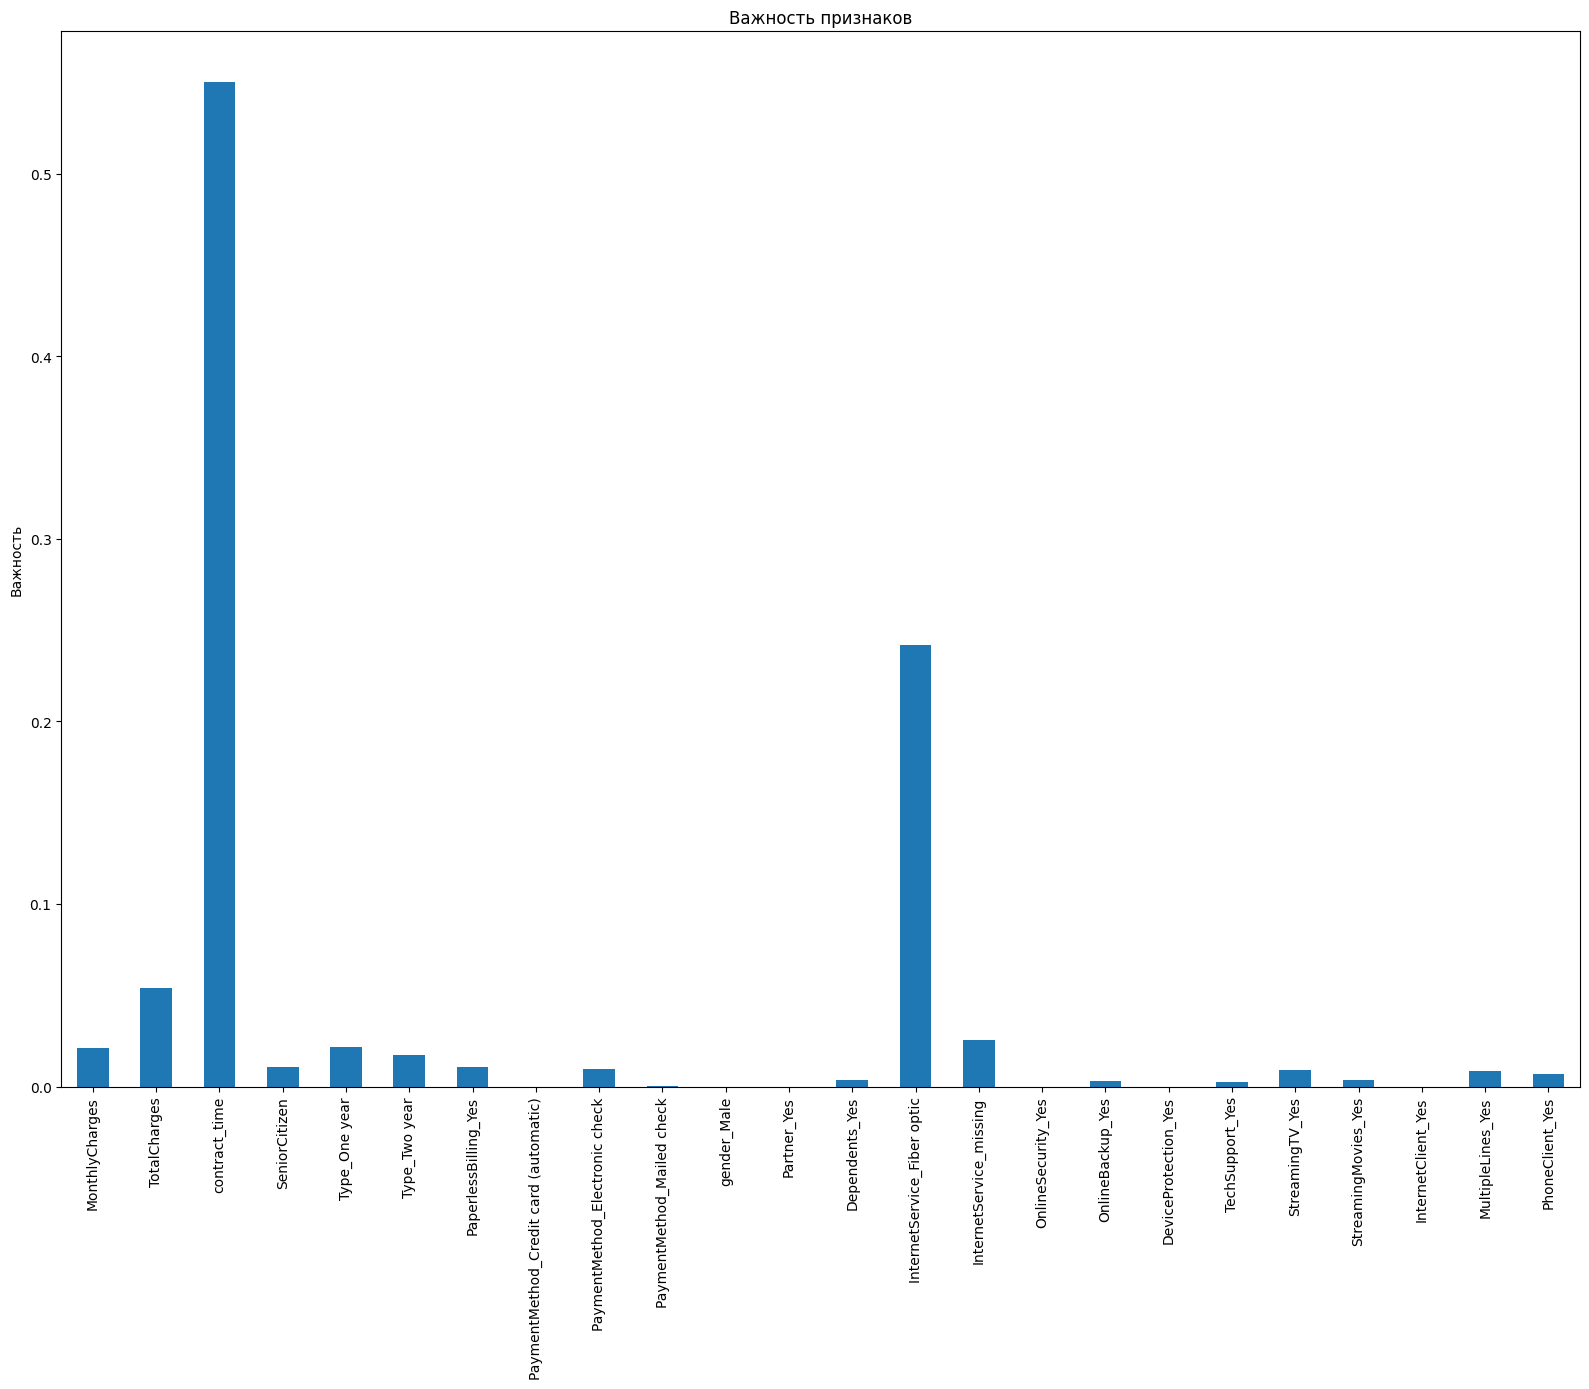

In [954]:
fig, ax = plt.subplots(figsize=(16,14))
model_dtc_imp.plot.bar(ax=ax)
ax.set_title("Важность признаков")
ax.set_ylabel('Важность')
fig.tight_layout()

**Случайный лес**

In [955]:
#Создание модели случайного леса
model_rfc = RandomForestClassifier(random_state=12345, n_estimators=1000, max_depth=11)

In [956]:
#Обучение модели случайного леса
model_rfc.fit(features_train, target_train)

RandomForestClassifier(max_depth=11, n_estimators=1000, random_state=12345)

In [957]:
#Определение важности признаков
model_rfc_imp = pd.Series(model_rfc.feature_importances_, features_train.columns)

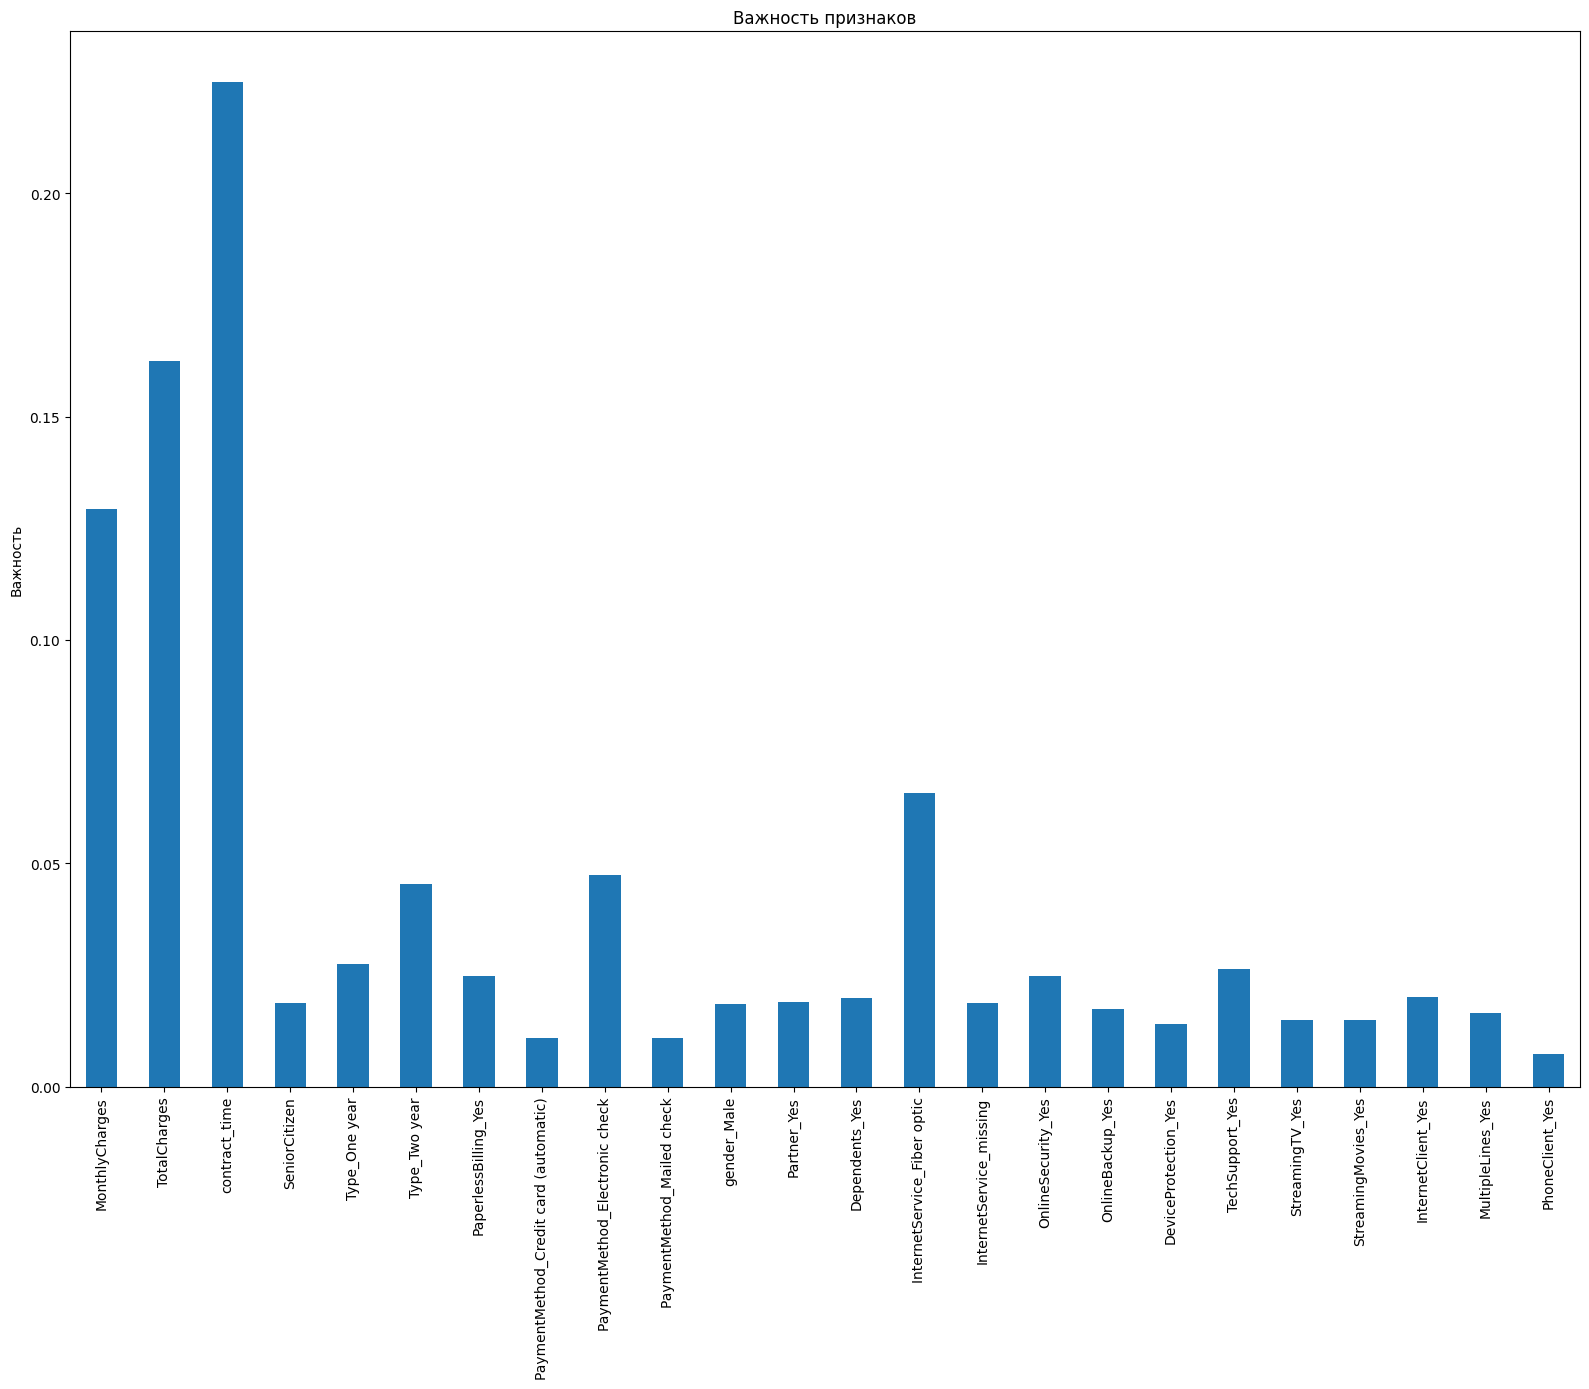

In [958]:
#Построение графика важности признаков
fig, ax = plt.subplots(figsize=(16,14))
model_rfc_imp.plot.bar(ax=ax)
ax.set_title("Важность признаков")
ax.set_ylabel('Важность')
fig.tight_layout()

**CatBoostClassifier**

Поскольку данная модель сама применяет кодирование категориальных признаков, используем для нее незакодированный набор данных data_full и отдельно подготовим выборки.

**Разделение признаков на целевой и остальные:**

In [959]:
#Целевой признак
target_cbc = data_full['Exited']

In [960]:
#Основные признаки
features_cbc = data_full.drop('Exited', axis=1)

**Разделение набора данных на обучающую, валидационную и тестовую выборки:**

In [961]:
#Разбиение данных на обучающую и валидационную выборки
features_cbc_train, features_cbc_valid, target_cbc_train, target_cbc_valid = train_test_split(features_cbc, target_cbc, test_size=0.4, random_state=12345)

In [962]:
#Разбиение, в свою очередь, валидационной выборки на валидационную и тестовую
features_cbc_valid, features_cbc_test, target_cbc_valid, target_cbc_test = train_test_split(features_cbc_valid, target_cbc_valid, test_size=0.5, random_state=12345)

**Оценка важности признаков**

In [963]:
#Создание модели
model_cbc = CatBoostClassifier(learning_rate=0.3, iterations=170) 

In [964]:
# Формирование списка категориальных признаков для передачи модели
cat_features = ['Type',  'PaymentMethod',  'SeniorCitizen',  'Dependents', 'PaperlessBilling','gender',
                'Partner','DeviceProtection','InternetService', 'OnlineSecurity', 'OnlineBackup',  'TechSupport',
               'StreamingTV', 'StreamingMovies', 'InternetClient', 'MultipleLines', 'PhoneClient']

In [965]:
#Обучение модели
model_cbc.fit(features_cbc_train, target_cbc_train, cat_features=cat_features, verbose=170) 

0:	learn: 0.5441330	total: 31.6ms	remaining: 5.34s
169:	learn: 0.1548889	total: 4.88s	remaining: 0us


In [966]:
#Определение важности признаков
model_cbc_imp = pd.Series(model_cbc.feature_importances_, features_cbc_train.columns)

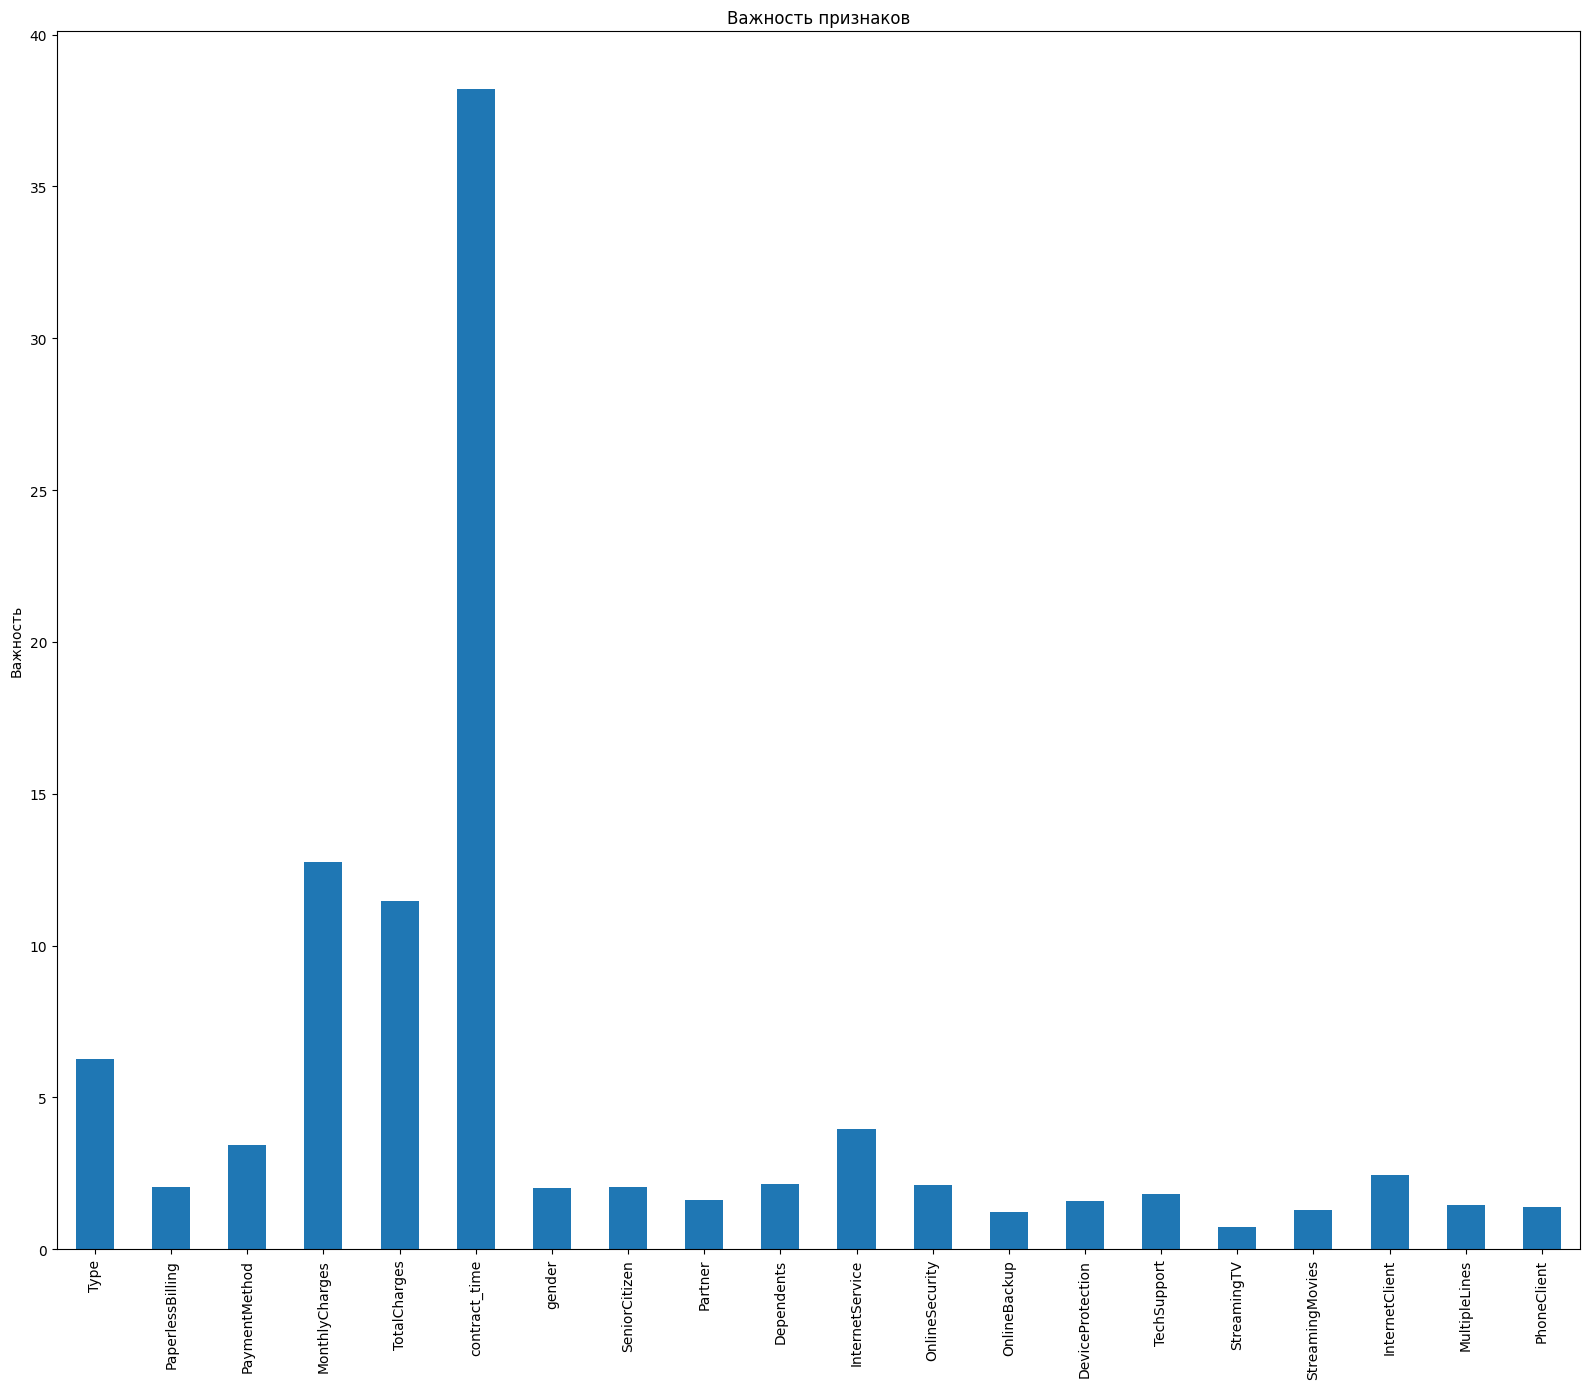

In [967]:
#Построение графика важности признаков
fig, ax = plt.subplots(figsize=(16,14))
model_cbc_imp.plot.bar(ax=ax)
ax.set_title("Важность признаков")
ax.set_ylabel('Важность')
fig.tight_layout()

**Вывод:**
Для всех моделей важность признака TotalCharges ниже, чем важность признака contract_time.

#### Удаление признака TotalCharges

Удаление признака TotalCharge будет выполнено отдельно для моделей логистической регрессии, решающего дерева, случайного леса, и отдельно для модели CatBoostClassifier.

In [968]:
data_full_ohe = data_full_ohe.drop(['TotalCharges'],axis=1)

In [969]:
data_full = data_full.drop(['TotalCharges'],axis=1)

#### Повторное разделение набора данных на выборки

In [970]:
#Основные признаки
features = data_full_ohe.drop('Exited', axis=1)

In [971]:
#Разбиение данных на обучающую и валидационную выборки
features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.4, random_state=12345)

In [972]:
#Разбиение, в свою очередь, валидационной выборки на валидационную и тестовую
features_valid, features_test, target_valid, target_test = train_test_split(features_valid, target_valid, test_size=0.5, random_state=12345)

#### Повторное разделение данных на выборки для модели CatBoostClassifier

In [973]:
#Основные признаки
features_cbc = data_full.drop('Exited', axis=1)

In [974]:
#Разбиение данных на обучающую и валидационную выборки
features_cbc_train, features_cbc_valid, target_cbc_train, target_cbc_valid = train_test_split(features_cbc, target_cbc, test_size=0.4, random_state=12345)

In [975]:
#Разбиение, в свою очередь, валидационной выборки на валидационную и тестовую
features_cbc_valid, features_cbc_test, target_cbc_valid, target_cbc_test = train_test_split(features_cbc_valid, target_cbc_valid, test_size=0.5, random_state=12345)

## Создание и обучение модели

### Логистическая регрессия

Логистическая регрессия. Создадим, обучим и проверим с помощью AUC-ROC и accuracy модель логистической регрессии.

In [976]:
#Создание модели логистической регрессии
model_lr = LogisticRegression(random_state=12345, solver='liblinear')

In [977]:
#Обучение модели логистической регрессии
model_lr.fit(features_train, target_train)

LogisticRegression(random_state=12345, solver='liblinear')

In [978]:
#Предсказания модели логистической регрессии
predicted_valid = model_lr.predict(features_valid)

AUC-ROC логистической регрессии

In [979]:
#Вычисление вероятностей классов каждого объекта валидационной выборки
probabilities_valid = model_lr.predict_proba(features_valid)

In [980]:
#Вероятность класса 1 у каждого объекта валидационной выборки
probabilities_one_valid = probabilities_valid[:, 1]

In [981]:
#Вычисление значения AUC-ROC для логистической регрессии
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

In [982]:
#Вывод полученного значения AUC-ROC
print("AUC-ROC:", auc_roc)

AUC-ROC: 0.8515474849227914


Accuracy логистической регрессии

In [983]:
# Вычисление значения accuracy
accuracy = accuracy_score(target_valid, predicted_valid) 

In [984]:
# Вывод полученного значения accuracy
print("accuracy:", accuracy)

accuracy: 0.8026969481902059


### Решающее дерево

Решающее дерево. Создадим, обучим и проверим с помощью AUC-ROC и accuracy модель решающего дерева.

In [985]:
#Создание модели решающего дерева
model_dtc = DecisionTreeClassifier(random_state=12345, max_depth=7)

In [986]:
#Обучение модели решающего дерева
model_dtc.fit(features_train, target_train)

DecisionTreeClassifier(max_depth=7, random_state=12345)

Оценим важность признаков с помощью метода feature_importances_

In [987]:
#Предсказания модели решающего дерева
predicted_valid = model_dtc.predict(features_valid)

AUC-ROC решающего дерева

In [988]:
#Вычисление вероятностей классов каждого объекта валидационной выборки
probabilities_valid = model_dtc.predict_proba(features_valid)

In [989]:
#Вероятность класса 1 у каждого объекта валидационной выборки
probabilities_one_valid = probabilities_valid[:, 1]

In [990]:
#Вычисление значения AUC-ROC для модели решающего дерева
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

In [991]:
#Вывод полученного значения AUC-ROC
print("AUC-ROC:", auc_roc)

AUC-ROC: 0.8442370142283987


Accuracy решающего дерева

In [992]:
# Вычисление значения accuracy
accuracy = accuracy_score(target_valid, predicted_valid) 

In [993]:
# Вывод полученного значения accuracy
print("accuracy:", accuracy)

accuracy: 0.8119233498935415


### Случайный лес

Случайный лес. Создадим, обучим и проверим с помощью AUC-ROC и accuracy модель случайного леса.

In [1125]:
#Создание модели случайного леса
model_rfc = RandomForestClassifier(random_state=12345, n_estimators=150, max_depth=10)

In [1126]:
#Обучение модели случайного леса
model_rfc.fit(features_train, target_train)

RandomForestClassifier(max_depth=10, n_estimators=150, random_state=12345)

In [1127]:
#Предсказания модели случайного леса
predicted_valid = model_rfc.predict(features_valid)

AUC-ROC случайного леса

In [1128]:
#Вычисление вероятностей классов каждого объекта валидационной выборки
probabilities_valid = model_rfc.predict_proba(features_valid)

In [1129]:
#Вероятность класса 1 у каждого объекта валидационной выборки
probabilities_one_valid = probabilities_valid[:, 1]

In [1130]:
#Вычисление значения AUC-ROC для модели случайного леса
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

In [1131]:
#Вывод полученного значения AUC-ROC
print("AUC-ROC:", auc_roc)

AUC-ROC: 0.8609430201318332


Accuracy случайного леса

In [1132]:
# Вычисление значения accuracy
accuracy = accuracy_score(target_valid, predicted_valid) 

In [1133]:
# Вывод полученного значения accuracy
print("accuracy:", accuracy)

accuracy: 0.8161816891412349


### CatBoostClassifier

In [1003]:
#Создание модели
model_cbc = CatBoostClassifier(learning_rate=0.3, iterations=200) 

In [1004]:
# Формирование списка категориальных признаков для передачи модели
cat_features = ['Type',  'PaymentMethod',  'SeniorCitizen',  'Dependents', 'PaperlessBilling','gender',
                'Partner','DeviceProtection','InternetService', 'OnlineSecurity', 'OnlineBackup',  'TechSupport',
               'StreamingTV', 'StreamingMovies', 'InternetClient', 'MultipleLines', 'PhoneClient']

In [1005]:
#Обучение модели
model_cbc.fit(features_cbc_train, target_cbc_train, cat_features=cat_features, verbose=170) 

0:	learn: 0.5375207	total: 29ms	remaining: 5.76s
170:	learn: 0.1603912	total: 5.21s	remaining: 883ms
199:	learn: 0.1446877	total: 6.14s	remaining: 0us


In [1006]:
#Предсказания модели на валидационной выборке
predicted_cbc_valid = model_cbc.predict(features_cbc_valid)

AUC-ROC CatBoostClassifier

In [1007]:
#Вычисление вероятностей классов каждого объекта валидационной выборки
probabilities_valid = model_cbc.predict_proba(features_cbc_valid)

In [1008]:
#Вероятность класса 1 у каждого объекта валидационной выборки
probabilities_one_valid = probabilities_valid[:, 1]

In [1009]:
#Вычисление значения AUC-ROC для модели CatBoostClassifier
auc_roc = roc_auc_score(target_cbc_valid, probabilities_one_valid)

In [1010]:
#Вывод полученного значения AUC-ROC
print("AUC-ROC:", auc_roc)

AUC-ROC: 0.910968000122351


Accuracy CatBoostClassifier

In [1011]:
# Вычисление значения accuracy
accuracy = accuracy_score(target_cbc_valid, predicted_cbc_valid) 

In [1012]:
# Вывод полученного значения accuracy
print("accuracy:", accuracy)

accuracy: 0.8559261887863733


## Проверка модели на тестовой выборке

### Логистическая регрессия

In [1013]:
#Предсказания модели логистической регрессии на тестовой выборке
predicted_test = model_lr.predict(features_test)

AUC-ROC логистической регрессии

In [1014]:
#Вычисление вероятностей классов каждого объекта тестовой выборки
probabilities_test = model_lr.predict_proba(features_test)

In [1015]:
#Вероятность класса 1 у каждого объекта тестовой выборки
probabilities_one_test = probabilities_test[:, 1]

In [1016]:
#Вычисление значения AUC-ROC для модели логистической регрессии на тестовой выборке
auc_roc = roc_auc_score(target_test, probabilities_one_test)

In [1017]:
#Вывод полученного значения AUC-ROC
print("AUC-ROC:", auc_roc)

AUC-ROC: 0.8205496381160764


Accuracy логистической регрессии

In [1018]:
# Вычисление значения accuracy
accuracy = accuracy_score(target_test, predicted_test) 

In [1019]:
# Вывод полученного значения accuracy
print("accuracy:", accuracy)

accuracy: 0.7899219304471257


### Решающее дерево

In [1020]:
#Предсказания модели решающего дерева на тестовой выборке
predicted_test = model_dtc.predict(features_test)

AUC-ROC решающего дерева

In [1021]:
#Вычисление вероятностей классов каждого объекта тестовой выборки
probabilities_test = model_dtc.predict_proba(features_test)

In [1022]:
#Вероятность класса 1 у каждого объекта тестовой выборки
probabilities_one_test = probabilities_test[:, 1]

In [1023]:
#Вычисление значения AUC-ROC для модели решающего дерева на тестовой выборке
auc_roc = roc_auc_score(target_test, probabilities_one_test)

In [1024]:
#Вывод полученного значения AUC-ROC
print("AUC-ROC:", auc_roc)

AUC-ROC: 0.8352592446274545


Accuracy решающего дерева

In [1025]:
# Вычисление значения accuracy
accuracy = accuracy_score(target_test, predicted_test) 

In [1026]:
# Вывод полученного значения accuracy
print("accuracy:", accuracy)

accuracy: 0.8140525195173882


### Случайный лес

In [1134]:
#Предсказания модели случайного леса на тестовой выборке
predicted_test = model_rfc.predict(features_test)

AUC-ROC случайного леса

In [1135]:
#Вычисление вероятностей классов каждого объекта тестовой выборки
probabilities_test = model_rfc.predict_proba(features_test)

In [1136]:
#Вероятность класса 1 у каждого объекта тестовой выборки
probabilities_one_test = probabilities_test[:, 1]

In [1137]:
#Вычисление значения AUC-ROC для модели случайного леса на тестовой выборке
auc_roc = roc_auc_score(target_test, probabilities_one_test)

In [1138]:
#Вывод полученного значения AUC-ROC
print("AUC-ROC:", auc_roc)

AUC-ROC: 0.8381879973054969


Accuracy случайного леса

In [1139]:
# Вычисление значения accuracy
accuracy = accuracy_score(target_test, predicted_test) 

In [1140]:
# Вывод полученного значения accuracy
print("accuracy:", accuracy)

accuracy: 0.8019872249822569


####  CatBoostClassifier

In [1034]:
#Предсказания модели на тестовой выборке
predicted_cbc_test = model_cbc.predict(features_cbc_test)

AUC-ROC CatBoostClassifier

In [1035]:
#Вычисление вероятностей классов каждого объекта валидационной выборки
probabilities_test = model_cbc.predict_proba(features_cbc_test)

In [1036]:
#Вероятность класса 1 у каждого объекта валидационной выборки
probabilities_one_test = probabilities_test[:, 1]

In [1037]:
#Вычисление значения AUC-ROC для модели CatBoostClassifier
auc_roc = roc_auc_score(target_cbc_test, probabilities_one_test)

In [1038]:
#Вывод полученного значения AUC-ROC
print("AUC-ROC:", auc_roc)

AUC-ROC: 0.905744305836233


Это лучшее значение метрики AUC-ROC на тестовой выборке.

Accuracy CatBoostClassifier

In [1039]:
# Вычисление значения accuracy
accuracy = accuracy_score(target_cbc_test, predicted_cbc_test) 

In [1040]:
# Вывод полученного значения accuracy
print("accuracy:", accuracy)

accuracy: 0.8630234208658624


## Вывод

Были созданы и обучены модели логистической регрессии, решающего дерева, случайного леса и CatBoostClassifier. Каждая модель была проверена с помощью двух метрик: AUC-ROC и, дополнительно, accuracy. Наилучшие значения метрик на тестовой выборке были достигнуты с помощью модели CatBoostClassifier.  Наилучшее значение AUC-ROC = 0.905744305836233, и accuracy = 0.8630234208658624.